In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


In [27]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type        to reduce memory usage.            """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                #    df[col] = df[col].astype(np.float32)
                #else:
                df[col] = df[col].astype(np.float16)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [28]:
df_train=pd.read_csv('train_final.csv')
df_test=pd.read_csv('test_final.csv')

In [29]:
print(df_train.shape)
target=df_train.Y
df_train.drop('Y',axis='columns',inplace=True)


(16383, 26)


In [30]:
df_train

,Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1,25884,1,33.63,118596,1,0,118595,125738,1,...,1945,118450,119184,1,121372,1,1,1,2,1
1,2,34346,1,10.62,118041,1,0,117902,130913,1,...,15385,117945,292795,1,259173,1,1,1,1,1
2,3,34923,1,1.77,118327,1,0,117961,124402,1,...,7547,118933,290919,1,118784,1,1,1,1,1
3,4,80926,1,30.09,118300,1,0,117961,301218,1,...,4933,118458,118331,1,307024,1,1,1,2,1
4,5,4674,1,1.77,119921,1,0,119920,302830,1,...,13836,142145,4673,1,128230,1,1,1,620,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,16379,33328,1,1.77,118343,1,0,117961,117906,1,...,4533,118700,290919,1,118321,1,1,1,1,1
16379,16380,19944,1,1.77,118225,1,0,117961,132097,1,...,4663,120323,119095,3,132096,1,1,1,8,1
16380,16381,28359,1,3.54,118327,1,0,117961,174445,1,...,7822,118492,270488,1,132692,1,2,1,1,1
16381,16382,7542,1,3.54,118343,1,0,117961,117906,1,...,6257,120722,290919,1,118784,1,1,1,12,1


In [31]:
print(df_test.shape)
df_test

(16385, 25)


,Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,16384,37733,1,1.77,118603,1,0,118602,118097,1,...,13881,117941,117887,1,117885,1,1,1,1,1
1,16385,312129,1,3.54,118052,1,0,117961,290919,1,...,14638,118992,290919,1,118321,1,1,1,7,1
2,16386,24884,1,23.01,118300,1,0,117961,302830,1,...,770,119181,4673,1,128230,1,1,1,14,1
3,16387,4674,1,1.77,119091,1,0,119062,118036,1,...,16752,143531,290919,1,117905,1,1,1,81,1
4,16388,68725,1,3.54,118300,1,0,117961,171056,1,...,4945,118360,118638,1,118636,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16380,32764,971,1,1.77,118300,1,0,117961,310997,1,...,4864,123055,118424,1,120344,1,1,1,44,1
16381,32765,105802,1,1.77,118327,1,0,117961,117906,1,...,32457,118320,290919,1,118321,1,1,1,4,1
16382,32766,43096,1,3.54,117962,1,0,117961,118368,1,...,2014,117904,117887,1,118368,1,1,1,1,1
16383,32767,31220,1,1.77,118386,1,0,117961,117906,1,...,1249,118910,290919,1,118321,1,1,1,2,2


In [32]:
frames=[df_train,df_test]
df=pd.concat(frames)
reduce_mem_usage(df)

Memory usage of dataframe is 6.50 MB
Memory usage after optimization is: 2.25 MB
Decreased by 65.4%


,Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1,25884,1,33.625000,118596,1,0,118595,125738,1,...,1945,118450,119184,1,121372,1,1,1,2,1
1,2,34346,1,10.617188,118041,1,0,117902,130913,1,...,15385,117945,292795,1,259173,1,1,1,1,1
2,3,34923,1,1.769531,118327,1,0,117961,124402,1,...,7547,118933,290919,1,118784,1,1,1,1,1
3,4,80926,1,30.093750,118300,1,0,117961,301218,1,...,4933,118458,118331,1,307024,1,1,1,2,1
4,5,4674,1,1.769531,119921,1,0,119920,302830,1,...,13836,142145,4673,1,128230,1,1,1,620,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16380,32764,971,1,1.769531,118300,1,0,117961,310997,1,...,4864,123055,118424,1,120344,1,1,1,44,1
16381,32765,105802,1,1.769531,118327,1,0,117961,117906,1,...,32457,118320,290919,1,118321,1,1,1,4,1
16382,32766,43096,1,3.539062,117962,1,0,117961,118368,1,...,2014,117904,117887,1,118368,1,1,1,1,1
16383,32767,31220,1,1.769531,118386,1,0,117961,117906,1,...,1249,118910,290919,1,118321,1,1,1,2,2


In [33]:
df

NameError: name 'df1' is not defined

In [9]:
df.describe()

,Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
count,32768.000000,32768.000000,32768.000000,3.276800e+04,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,...,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,3.276800e+04,32768.000000
mean,16384.500000,42923.115509,1.042511,inf,118301.823212,1.045441,0.047760,116952.597015,170179.938049,1.043030,...,25989.522491,118912.771729,183700.136932,1.048279,125916.370300,1.045715,1.043549,1.041229,2.228435e+04,1.043182
std,9459.451147,34174.395115,0.265731,inf,4551.658025,0.276843,0.310656,10875.728116,69509.942939,0.263166,...,35928.434551,18961.612193,100488.195184,0.294797,31036.914405,0.263293,0.265218,0.240249,2.305925e+06,0.267341
min,1.000000,-1.000000,1.000000,1.769531e+00,23779.000000,1.000000,0.000000,4292.000000,4673.000000,1.000000,...,25.000000,4674.000000,3130.000000,1.000000,117879.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
25%,8192.750000,20298.000000,1.000000,1.769531e+00,118102.000000,1.000000,0.000000,117961.000000,117906.000000,1.000000,...,4566.000000,118394.000000,118363.000000,1.000000,118274.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
50%,16384.500000,35375.000000,1.000000,1.769531e+00,118300.000000,1.000000,0.000000,117961.000000,128696.000000,1.000000,...,13545.000000,118921.000000,119006.000000,1.000000,118568.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000
75%,24576.250000,74188.250000,1.000000,3.539062e+00,118386.000000,1.000000,0.000000,117961.000000,235280.000000,1.000000,...,42034.000000,120535.000000,290919.000000,1.000000,120006.000000,1.000000,1.000000,1.000000,9.000000e+00,1.000000
max,32768.000000,312152.000000,17.000000,4.390400e+04,286791.000000,12.000000,24.000000,311178.000000,311867.000000,11.000000,...,311696.000000,286792.000000,308574.000000,18.000000,311867.000000,8.000000,12.000000,7.000000,4.042886e+08,16.000000


<AxesSubplot:>

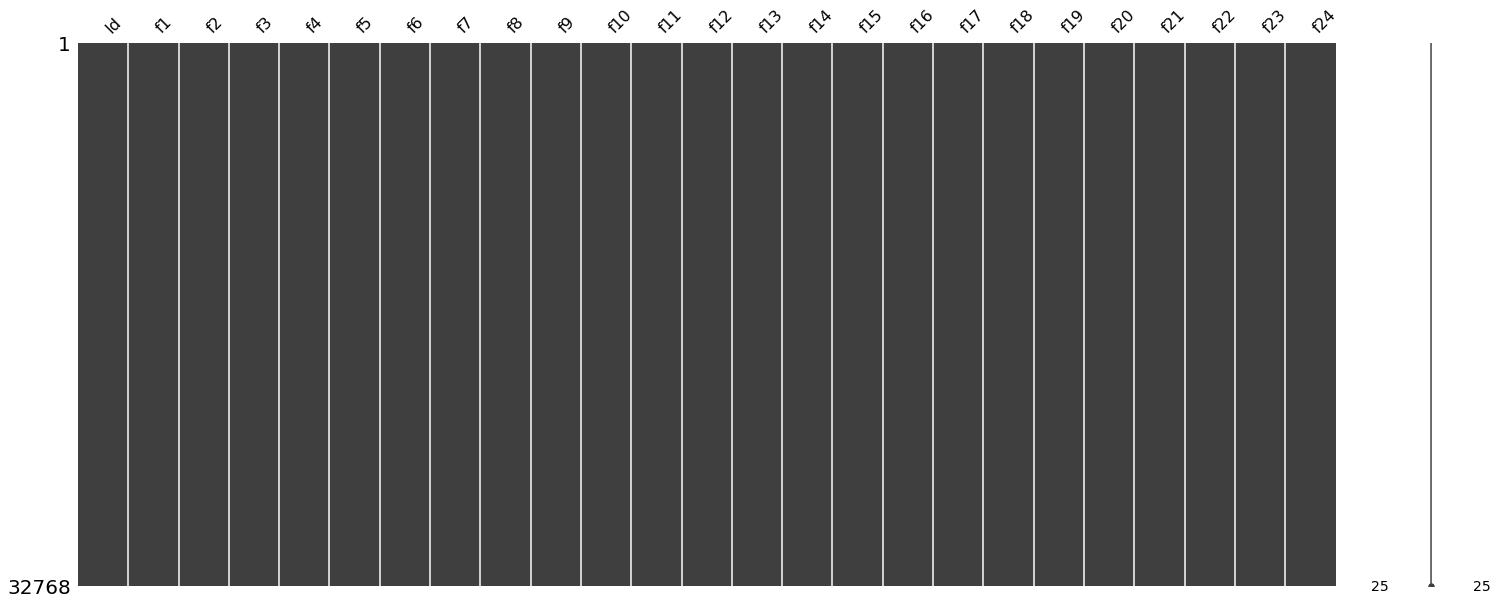

In [10]:
msno.matrix(df)

In [11]:
# CHECKING NAN VALUES
df.isna().sum()
# NO NAN VALUES

Id     0
f1     0
f2     0
f3     0
f4     0
f5     0
f6     0
f7     0
f8     0
f9     0
f10    0
f11    0
f12    0
f13    0
f14    0
f15    0
f16    0
f17    0
f18    0
f19    0
f20    0
f21    0
f22    0
f23    0
f24    0
dtype: int64

In [12]:
## REMOVING ZERO VARIANCE COLUMNS
zero_var=[]
for col in df.columns:
        if (len(df[col].unique()))==1:
            zero_var.append(col)
zero_var
# NO ZERO VAR COLUMNS

[]

In [13]:
# correlation with target value for training columns
corr=df_train.corrwith(target)
corr.sort_values(ascending=False)
# correlation of features is very low

f14    0.031292
f13    0.017812
f24    0.016778
f6     0.015522
f20    0.011192
f11    0.008494
f8     0.005902
f12    0.005068
f21    0.004252
f10    0.003834
f5     0.003077
f16    0.002596
f23    0.002507
f3     0.002483
f22    0.001859
f18    0.001575
f19    0.000933
f4    -0.000037
f9    -0.000367
f1    -0.000444
f2    -0.000920
f15   -0.003840
f7    -0.006114
f17   -0.006608
Id    -0.009178
dtype: float64

In [15]:
#low_corr_columns=f19,f4,f9,f1,f2
# lets try dropping these columns
df.drop('f19',axis='columns',inplace=True)
df.drop('f4',axis='columns',inplace=True)
df.drop('f9',axis='columns',inplace=True)
df.drop('f1',axis='columns',inplace=True)
df.drop('f2',axis='columns',inplace=True)

In [16]:
# CHECKING HOW MANY UNIQUE VALUES IN EACH LIST
for col in df.columns:
        print(col,len(df[col].unique()))
            

Id 32768
f3 241
f5 9
f6 10
f7 128
f8 2358
f10 267
f11 7
f12 244
f13 343
f14 9524
f15 4243
f16 449
f17 67
f18 9
f20 8
f21 9
f22 7
f23 1413
f24 8


Text(0, 0.5, 'target')

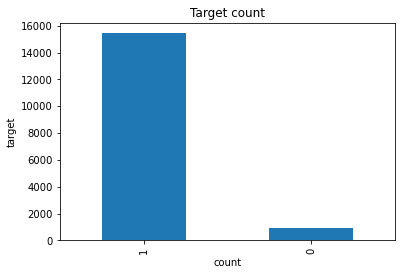

In [17]:
fig, (ax1) = plt.subplots(nrows=1)
target.value_counts().plot(kind='bar')
ax1.set_title('Target count')
ax1.set_xlabel('count')
ax1.set_ylabel('target')
# THE 1 IS VERY HIGH COMPARED TO THE 0


In [18]:
target.value_counts(0)

1    15435
0      948
Name: Y, dtype: int64

In [20]:
#print(df.f1.hist())
plt.show()
#print(df.f2.hist())
plt.show()


AttributeError: 'DataFrame' object has no attribute 'f2'

AxesSubplot(0.125,0.125;0.775x0.755)


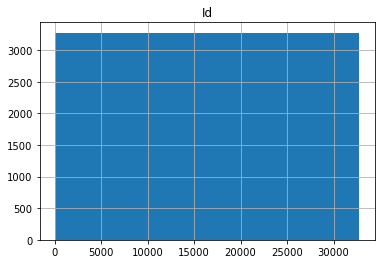

AxesSubplot(0.125,0.125;0.775x0.755)


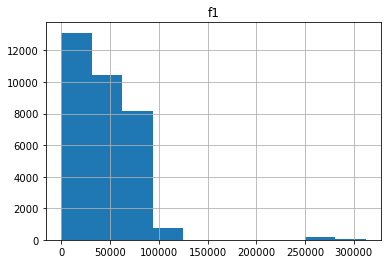

AxesSubplot(0.125,0.125;0.775x0.755)


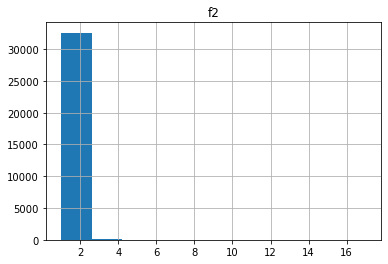

AxesSubplot(0.125,0.125;0.775x0.755)


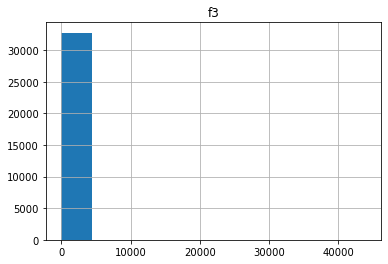

AxesSubplot(0.125,0.125;0.775x0.755)


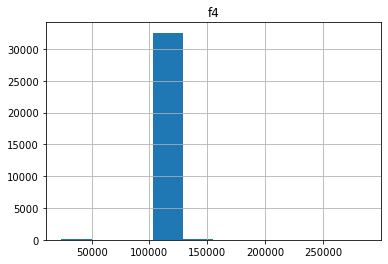

AxesSubplot(0.125,0.125;0.775x0.755)


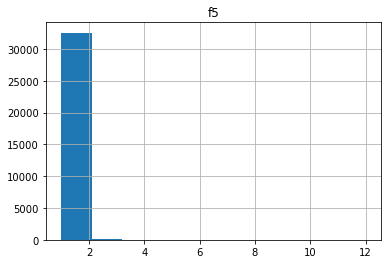

AxesSubplot(0.125,0.125;0.775x0.755)


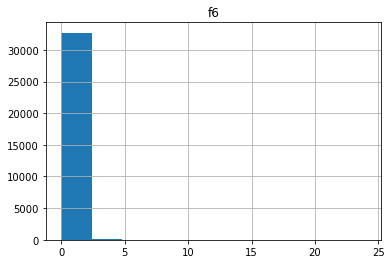

AxesSubplot(0.125,0.125;0.775x0.755)


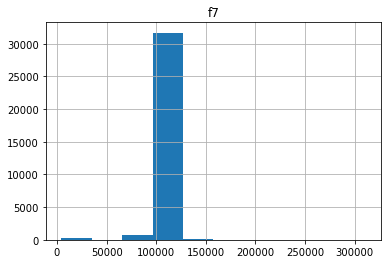

AxesSubplot(0.125,0.125;0.775x0.755)


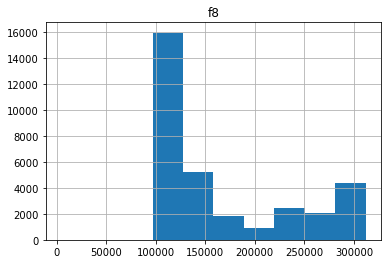

AxesSubplot(0.125,0.125;0.775x0.755)


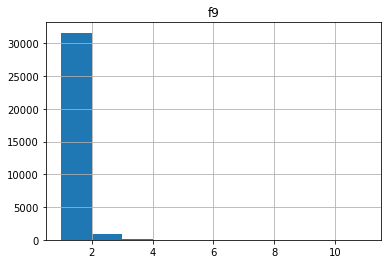

AxesSubplot(0.125,0.125;0.775x0.755)


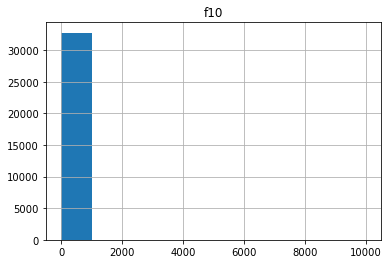

AxesSubplot(0.125,0.125;0.775x0.755)


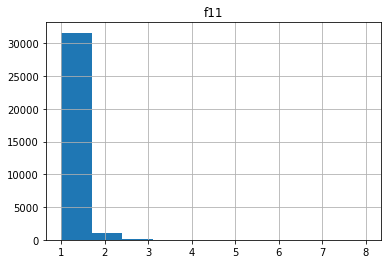

AxesSubplot(0.125,0.125;0.775x0.755)


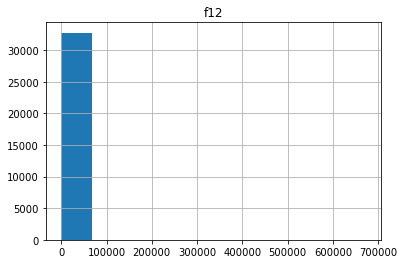

AxesSubplot(0.125,0.125;0.775x0.755)


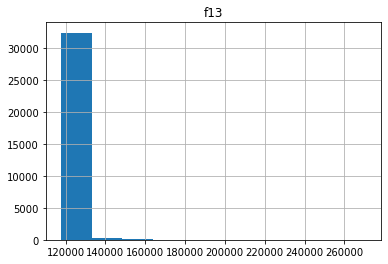

AxesSubplot(0.125,0.125;0.775x0.755)


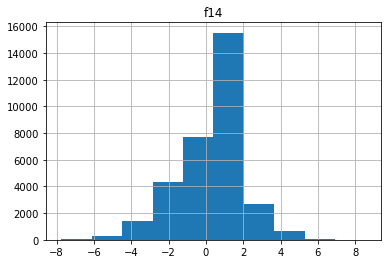

AxesSubplot(0.125,0.125;0.775x0.755)


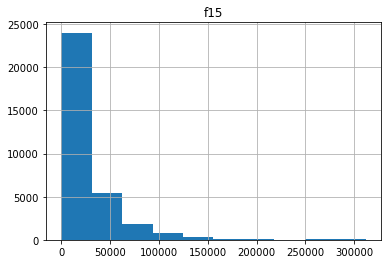

AxesSubplot(0.125,0.125;0.775x0.755)


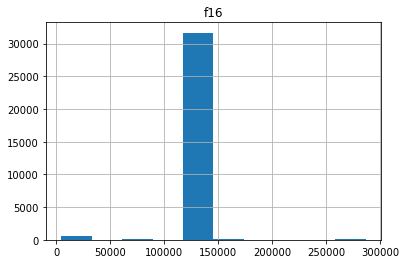

AxesSubplot(0.125,0.125;0.775x0.755)


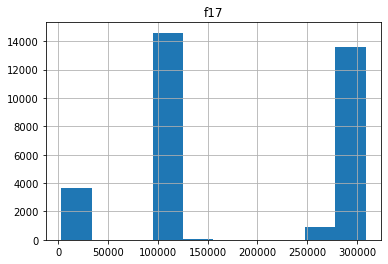

AxesSubplot(0.125,0.125;0.775x0.755)


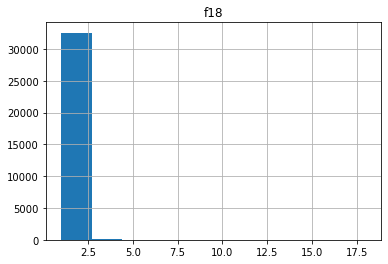

AxesSubplot(0.125,0.125;0.775x0.755)


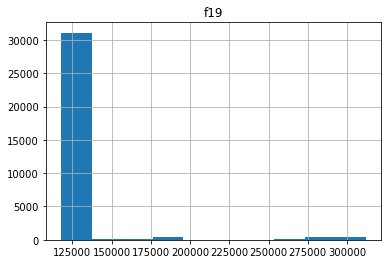

AxesSubplot(0.125,0.125;0.775x0.755)


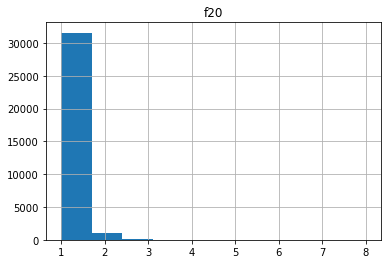

AxesSubplot(0.125,0.125;0.775x0.755)


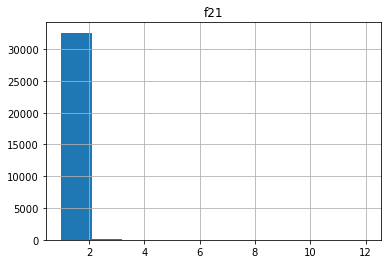

AxesSubplot(0.125,0.125;0.775x0.755)


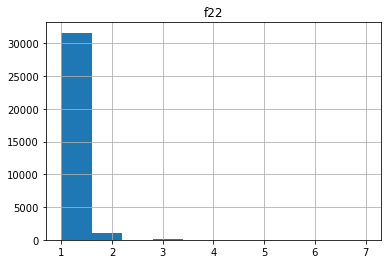

AxesSubplot(0.125,0.125;0.775x0.755)


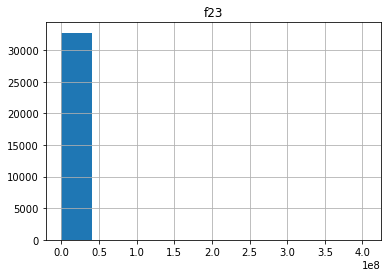

AxesSubplot(0.125,0.125;0.775x0.755)


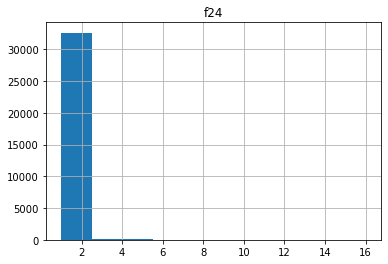

In [96]:
#fig,ax=plt.subplots(nrows=len(df.columns),figsize=(5,len(df.columns)*3.5))
for i in df.columns:
    print(df[i].hist())
    plt.title(i)
    plt.show() 
    
    

In [21]:
ID=df.Id
df1=df.drop('Id',axis='columns')
test_ID=ID[16383:]
test_ID.shape

(16385,)

In [22]:
scaler = MinMaxScaler()
df2=np.array(df1)
scaler.fit(df2)
df3=scaler.transform(df2)
Norm_df=pd.DataFrame(df3)

In [23]:
Norm_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000726,0.0,0.0,0.372461,0.394099,0.0003,0.0,0.000001,0.022865,0.336366,0.006160,0.403292,0.379952,0.0,0.0,0.0,0.0,2.473480e-09,0.000000
1,0.000202,0.0,0.0,0.370203,0.410946,0.0001,0.0,0.000033,0.006956,0.456488,0.049283,0.401502,0.948341,0.0,0.0,0.0,0.0,0.000000e+00,0.000000
2,0.000000,0.0,0.0,0.370395,0.389750,0.0002,0.0,0.000000,0.005929,0.598755,0.024134,0.405004,0.942199,0.0,0.0,0.0,0.0,0.000000e+00,0.000000
3,0.000645,0.0,0.0,0.370395,0.965335,0.0000,0.0,0.000000,0.002958,0.280824,0.015747,0.403321,0.377159,0.0,0.0,0.0,0.0,2.473480e-09,0.000000
4,0.000000,0.0,0.0,0.376778,0.970582,0.0000,0.0,0.000001,0.067737,0.510384,0.044313,0.487282,0.005052,0.0,0.0,0.0,0.0,1.531084e-06,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32763,0.000000,0.0,0.0,0.370395,0.997168,0.0000,0.0,0.000000,0.016138,0.536509,0.015526,0.419615,0.377464,0.0,0.0,0.0,0.0,1.063597e-07,0.000000
32764,0.000000,0.0,0.0,0.370395,0.368604,0.0000,0.0,0.000000,0.002892,0.510803,0.104058,0.402831,0.942199,0.0,0.0,0.0,0.0,7.420441e-09,0.000000
32765,0.000040,0.0,0.0,0.370395,0.370108,0.0000,0.0,0.000000,0.003966,0.536509,0.006382,0.401357,0.375706,0.0,0.0,0.0,0.0,0.000000e+00,0.000000
32766,0.000000,0.0,0.0,0.370395,0.368604,0.0001,0.0,0.000000,0.002892,0.329662,0.003927,0.404923,0.942199,0.0,0.0,0.0,0.0,2.473480e-09,0.066667


In [24]:
Norm_df_train=Norm_df[:16383]
Norm_df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000726,0.0,0.0,0.372461,0.394099,0.0003,0.0,0.000001,0.022865,0.336366,0.006160,0.403292,0.379952,0.000000,0.0,0.000000,0.0,2.473480e-09,0.0
1,0.000202,0.0,0.0,0.370203,0.410946,0.0001,0.0,0.000033,0.006956,0.456488,0.049283,0.401502,0.948341,0.000000,0.0,0.000000,0.0,0.000000e+00,0.0
2,0.000000,0.0,0.0,0.370395,0.389750,0.0002,0.0,0.000000,0.005929,0.598755,0.024134,0.405004,0.942199,0.000000,0.0,0.000000,0.0,0.000000e+00,0.0
3,0.000645,0.0,0.0,0.370395,0.965335,0.0000,0.0,0.000000,0.002958,0.280824,0.015747,0.403321,0.377159,0.000000,0.0,0.000000,0.0,2.473480e-09,0.0
4,0.000000,0.0,0.0,0.376778,0.970582,0.0000,0.0,0.000001,0.067737,0.510384,0.044313,0.487282,0.005052,0.000000,0.0,0.000000,0.0,1.531084e-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,0.000000,0.0,0.0,0.370395,0.368604,0.0000,0.0,0.000000,0.002892,0.536509,0.014464,0.404178,0.942199,0.000000,0.0,0.000000,0.0,0.000000e+00,0.0
16379,0.000000,0.0,0.0,0.370395,0.414800,0.0000,0.0,0.000028,0.093043,0.536509,0.014881,0.409931,0.379660,0.117647,0.0,0.000000,0.0,1.731436e-08,0.0
16380,0.000040,0.0,0.0,0.370395,0.552654,0.0002,0.0,0.000001,0.096943,0.585887,0.025017,0.403441,0.875309,0.000000,0.0,0.090909,0.0,0.000000e+00,0.0
16381,0.000040,0.0,0.0,0.370395,0.368604,0.0000,0.0,0.000000,0.005929,0.398911,0.019995,0.411346,0.942199,0.000000,0.0,0.000000,0.0,2.720828e-08,0.0


In [25]:
Norm_df_test=Norm_df[16383:]
Norm_df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
16383,0.000000,0.0,0.0,0.372484,0.369226,0.0000,0.0,0.000000,0.000052,0.625569,0.044457,0.401488,0.375706,0.0,0.0,0.0,0.0,0.000000e+00,0.000000
16384,0.000040,0.0,0.0,0.370395,0.931809,0.0004,0.0,0.000062,0.002892,0.474467,0.046886,0.405213,0.942199,0.0,0.0,0.0,0.0,1.484088e-08,0.000000
16385,0.000484,0.0,0.0,0.370395,0.970582,0.0000,0.0,0.000000,0.067737,0.536509,0.002390,0.405883,0.005052,0.0,0.0,0.0,0.0,3.215525e-08,0.000000
16386,0.000000,0.0,0.0,0.373983,0.369027,0.0009,0.0,0.000000,0.000183,0.536509,0.053669,0.492195,0.942199,0.0,0.0,0.0,0.0,1.978784e-07,0.000000
16387,0.000040,0.0,0.0,0.370395,0.541622,0.0000,0.0,0.000007,0.004967,0.444368,0.015786,0.402973,0.378164,0.0,0.0,0.0,0.0,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32763,0.000000,0.0,0.0,0.370395,0.997168,0.0000,0.0,0.000000,0.016138,0.536509,0.015526,0.419615,0.377464,0.0,0.0,0.0,0.0,1.063597e-07,0.000000
32764,0.000000,0.0,0.0,0.370395,0.368604,0.0000,0.0,0.000000,0.002892,0.510803,0.104058,0.402831,0.942199,0.0,0.0,0.0,0.0,7.420441e-09,0.000000
32765,0.000040,0.0,0.0,0.370395,0.370108,0.0000,0.0,0.000000,0.003966,0.536509,0.006382,0.401357,0.375706,0.0,0.0,0.0,0.0,0.000000e+00,0.000000
32766,0.000000,0.0,0.0,0.370395,0.368604,0.0001,0.0,0.000000,0.002892,0.329662,0.003927,0.404923,0.942199,0.0,0.0,0.0,0.0,2.473480e-09,0.066667


In [26]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
X_train1,X_test1,y_train1,y_test1= train_test_split(Norm_df_train,target,test_size=0.2)


In [27]:
from sklearn.model_selection import cross_val_score
dtrain = xgb.DMatrix(X_train1, label=y_train1)
dtest = xgb.DMatrix(X_test1, label=y_test1)
drealtrain = xgb.DMatrix(Norm_df_train, label=target)
drealtest = xgb.DMatrix(Norm_df_test)
from sklearn.metrics import accuracy_score

In [28]:
params = {
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'binary:logistic',
    'eval_metric':'auc'
}
NUM_BOOST_ROUNDS=999

In [29]:
xbg_model1 = xgb.train(
    params,
    dtrain,
    num_boost_round=NUM_BOOST_ROUNDS,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)
print("Best AUC: {:.2f}, found at round {}".format(
                 xbg_model1.best_score,
                 xbg_model1.best_iteration))

[0]	Test-auc:0.76564
[1]	Test-auc:0.77595
[2]	Test-auc:0.78846
[3]	Test-auc:0.79014
[4]	Test-auc:0.78721
[5]	Test-auc:0.78591
[6]	Test-auc:0.80198
[7]	Test-auc:0.80616
[8]	Test-auc:0.80731
[9]	Test-auc:0.81278
[10]	Test-auc:0.81342
[11]	Test-auc:0.80962
[12]	Test-auc:0.81219
[13]	Test-auc:0.82048
[14]	Test-auc:0.82376
[15]	Test-auc:0.82745
[16]	Test-auc:0.82761
[17]	Test-auc:0.83422
[18]	Test-auc:0.83119
[19]	Test-auc:0.83315
[20]	Test-auc:0.83251
[21]	Test-auc:0.83367
[22]	Test-auc:0.83537
[23]	Test-auc:0.83964
[24]	Test-auc:0.84231
[25]	Test-auc:0.84354
[26]	Test-auc:0.84290
[27]	Test-auc:0.84173
[28]	Test-auc:0.84258
[29]	Test-auc:0.84427
[30]	Test-auc:0.84260
[31]	Test-auc:0.84354
[32]	Test-auc:0.84238
[33]	Test-auc:0.84296
[34]	Test-auc:0.84387
[35]	Test-auc:0.84294
[36]	Test-auc:0.84220
[37]	Test-auc:0.84234
[38]	Test-auc:0.84528
[39]	Test-auc:0.84592
[40]	Test-auc:0.84650
[41]	Test-auc:0.84605
[42]	Test-auc:0.84567
[43]	Test-auc:0.84663
[44]	Test-auc:0.84608
[45]	Test-auc:0.8452

In [30]:
# Calculate cross validation
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=NUM_BOOST_ROUNDS,
    seed=42,
    nfold=5,
    metrics={'auc'},
    early_stopping_rounds=10
)
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.804301,0.008407,0.761298,0.006974
1,0.836409,0.004465,0.785247,0.008133
2,0.857325,0.008463,0.796582,0.013426
3,0.877197,0.006388,0.802599,0.009981
4,0.890478,0.004152,0.798336,0.009426
5,0.901326,0.006367,0.799060,0.008656
6,0.909349,0.005002,0.799550,0.007619
7,0.917873,0.005357,0.802811,0.006650
8,0.927020,0.004778,0.804706,0.005235
9,0.933057,0.005794,0.805365,0.007045


In [31]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(3,8)
    for min_child_weight in range(1,6)
]

# Define initial best params and MAE
max_auc = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=NUM_BOOST_ROUNDS,
        seed=42,
        nfold=5,
        metrics={'auc'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].idxmax()
    print("\tAUC {} for {} rounds\n".format(mean_auc, boost_rounds))
    if mean_auc <max_auc:
        max_auc=mean_auc
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], max_auc))
#print(best_params[0], best_params[1], max_auc)

CV with max_depth=3, min_child_weight=1
	AUC 0.8526583999999999 for 119 rounds

CV with max_depth=3, min_child_weight=2
	AUC 0.8509895999999999 for 101 rounds

CV with max_depth=3, min_child_weight=3
	AUC 0.8381738000000001 for 33 rounds

CV with max_depth=3, min_child_weight=4
	AUC 0.8384640000000001 for 36 rounds

CV with max_depth=3, min_child_weight=5
	AUC 0.8482045999999999 for 101 rounds

CV with max_depth=4, min_child_weight=1
	AUC 0.8446268 for 46 rounds

CV with max_depth=4, min_child_weight=2
	AUC 0.8448432 for 51 rounds

CV with max_depth=4, min_child_weight=3
	AUC 0.8549355999999999 for 128 rounds

CV with max_depth=4, min_child_weight=4
	AUC 0.8530823999999999 for 116 rounds

CV with max_depth=4, min_child_weight=5
	AUC 0.8492428000000001 for 117 rounds

CV with max_depth=5, min_child_weight=1
	AUC 0.8577921999999999 for 121 rounds

CV with max_depth=5, min_child_weight=2
	AUC 0.8482520000000001 for 54 rounds

CV with max_depth=5, min_child_weight=3
	AUC 0.8490768 for 78 r

In [32]:
params['max_depth'] = 5
params['min_child_weight'] = 1
params

{'max_depth': 5,
 'min_child_weight': 1,
 'eta': 0.3,
 'subsample': 1,
 'colsample_bytree': 1,
 'objective': 'binary:logistic',
 'eval_metric': 'auc'}

In [33]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]
# Define initial best params and MAE
max_auc = float("Inf")
best_params = None
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # Update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=NUM_BOOST_ROUNDS,
        seed=42,
        nfold=5,
        metrics={'auc'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].idxmax()
    print("\tAUC {} for {} rounds\n".format(mean_auc, boost_rounds))
    if mean_auc <max_auc:
        max_auc=mean_auc
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], max_auc))
#print(best_params[0], best_params[1], max_auc)

CV with subsample=1.0, colsample=1.0
	AUC 0.8577921999999999 for 121 rounds

CV with subsample=1.0, colsample=0.9
	AUC 0.8508377999999999 for 65 rounds

CV with subsample=1.0, colsample=0.8
	AUC 0.8564526000000001 for 92 rounds

CV with subsample=1.0, colsample=0.7
	AUC 0.8548166 for 89 rounds

CV with subsample=0.9, colsample=1.0
	AUC 0.8523346 for 92 rounds

CV with subsample=0.9, colsample=0.9
	AUC 0.8553010000000001 for 76 rounds

CV with subsample=0.9, colsample=0.8
	AUC 0.84892 for 49 rounds

CV with subsample=0.9, colsample=0.7
	AUC 0.8469597999999999 for 45 rounds

CV with subsample=0.8, colsample=1.0
	AUC 0.8530259999999998 for 103 rounds

CV with subsample=0.8, colsample=0.9
	AUC 0.8530478 for 78 rounds

CV with subsample=0.8, colsample=0.8
	AUC 0.8483892000000001 for 47 rounds

CV with subsample=0.8, colsample=0.7
	AUC 0.8514904 for 58 rounds

CV with subsample=0.7, colsample=1.0
	AUC 0.8417426000000001 for 44 rounds

CV with subsample=0.7, colsample=0.9
	AUC 0.8448122 for 4

In [34]:
params['subsample'] = 1
params['colsample_bytree'] = 1

In [35]:
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=NUM_BOOST_ROUNDS,
            seed=42,
            nfold=5,
            metrics=['auc'],
            early_stopping_rounds=10
          )
    # Update best score
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].idxmax()
    print("\tAUC {} for {} rounds\n".format(mean_auc, boost_rounds))
    if mean_auc <max_auc:
        max_auc=mean_auc
        best_params = eta
print("Best params: {}, AUC: {}".format(best_params, max_auc))

CV with eta=0.3
	AUC 0.8577921999999999 for 121 rounds

CV with eta=0.2
	AUC 0.8534748000000001 for 138 rounds

CV with eta=0.1
	AUC 0.8477995999999999 for 140 rounds

CV with eta=0.05
	AUC 0.8518806 for 448 rounds

CV with eta=0.01
	AUC 0.8056306 for 174 rounds

CV with eta=0.005
	AUC 0.7806982 for 27 rounds

Best params: 0.005, AUC: 0.7806982


In [36]:
params['eta']=0.3
params

{'max_depth': 5,
 'min_child_weight': 1,
 'eta': 0.3,
 'subsample': 1,
 'colsample_bytree': 1,
 'objective': 'binary:logistic',
 'eval_metric': 'auc'}

In [37]:
xbg_model1 = xgb.train(
    params,
    dtrain,
    num_boost_round=NUM_BOOST_ROUNDS,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)
print("Best AUC: {:.2f}, found at round {}".format(
                 xbg_model1.best_score,
                 xbg_model1.best_iteration))

[0]	Test-auc:0.76795
[1]	Test-auc:0.78304
[2]	Test-auc:0.79717
[3]	Test-auc:0.79184
[4]	Test-auc:0.79253
[5]	Test-auc:0.79512
[6]	Test-auc:0.79721
[7]	Test-auc:0.80026
[8]	Test-auc:0.80666
[9]	Test-auc:0.80325
[10]	Test-auc:0.80201
[11]	Test-auc:0.80964
[12]	Test-auc:0.82095
[13]	Test-auc:0.82613
[14]	Test-auc:0.82199
[15]	Test-auc:0.82046
[16]	Test-auc:0.82486
[17]	Test-auc:0.82312
[18]	Test-auc:0.82714
[19]	Test-auc:0.83708
[20]	Test-auc:0.83497
[21]	Test-auc:0.83844
[22]	Test-auc:0.83876
[23]	Test-auc:0.83835
[24]	Test-auc:0.83934
[25]	Test-auc:0.84064
[26]	Test-auc:0.84062
[27]	Test-auc:0.84318
[28]	Test-auc:0.84413
[29]	Test-auc:0.84660
[30]	Test-auc:0.84685
[31]	Test-auc:0.85153
[32]	Test-auc:0.85059
[33]	Test-auc:0.84944
[34]	Test-auc:0.84793
[35]	Test-auc:0.84762
[36]	Test-auc:0.84791
[37]	Test-auc:0.85004
[38]	Test-auc:0.84942
[39]	Test-auc:0.84981
[40]	Test-auc:0.84950
Best AUC: 0.85, found at round 31


In [38]:
xbg_model3 = xgb.train(
   params,
drealtrain,
    num_boost_round=31)

True     16076
False      309
Name: 0, dtype: int64

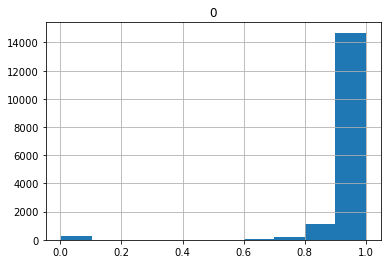

In [39]:
y_newpred=xbg_model3.predict(drealtest)
h=pd.DataFrame(y_newpred)
h.hist()
d=h>0.5
d[0].value_counts()

In [40]:
output2 = pd.DataFrame({'id':test_ID,'Y':y_newpred})
output2.to_csv('datascience4.csv', index=False)